In [23]:
import glob
# glob.glob("/mnt/experiment/TEM diffraction/")
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import file
import os
from calculate.rdf_calculator import _calculation_with_q
import matplotlib
import datetime
matplotlib.rcParams['figure.figsize'] = [10,10]
%matplotliblib qt 

UsageError: Line magic function `%matplotliblib` not found.


In [24]:
csvfiles = Path("/mnt/experiment/TEM diffraction/210708").rglob("*.csv")

In [25]:
fps = set()
for file in csvfiles:
    if file.name in ["diagonal.csv","diagonal_1.csv","line.csv"]:
        continue
    if "r30" in file.name:
        continue
    fp = str(file.absolute())
    idx = fp.find('\\')
    fps.add(fp[:idx])
fps = list(fps)
fps.sort()

In [26]:
str_parameter = r"\Parameters.csv"
str_data_r = r"\Data_r.csv"
str_data_q = r"\Data_q.csv"

In [27]:
# test= np.genfromtxt(fps[0]+str_data_r,names=True,delimiter=',')
print("total data : {}".format(len(fps)))

total data : 25


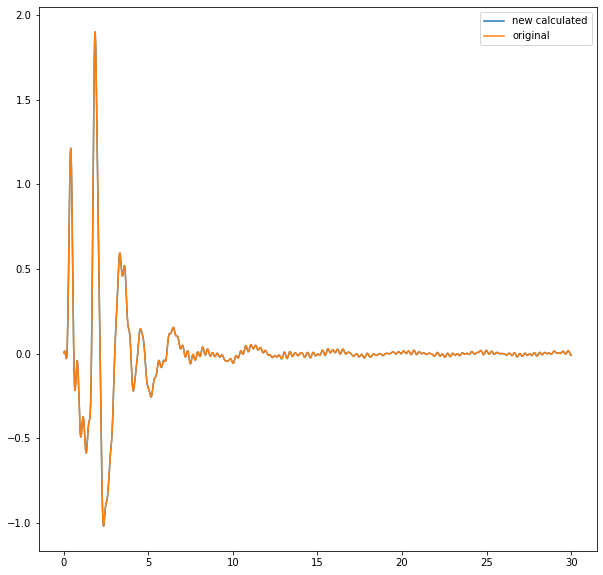

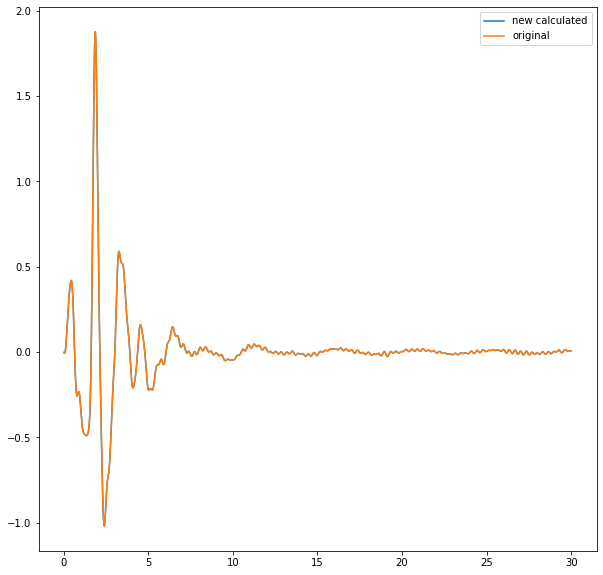

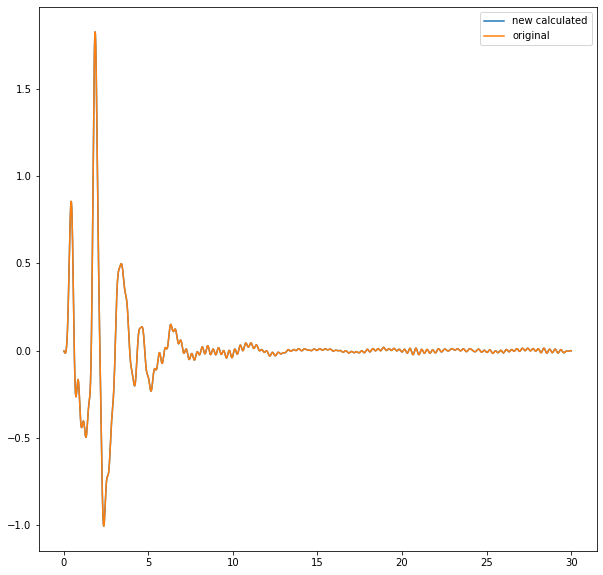

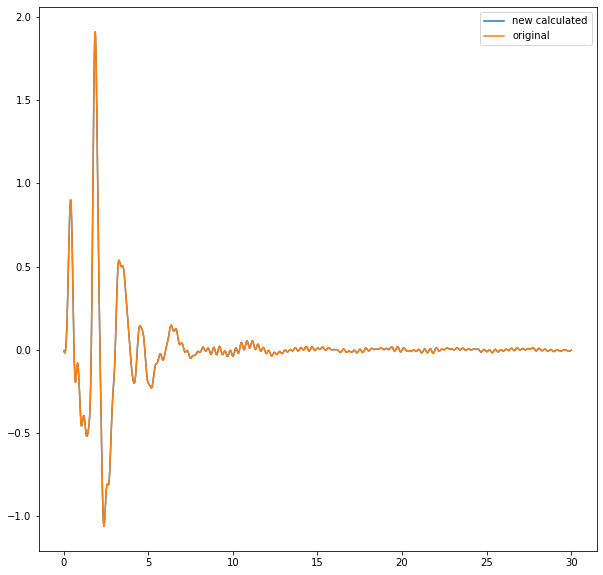

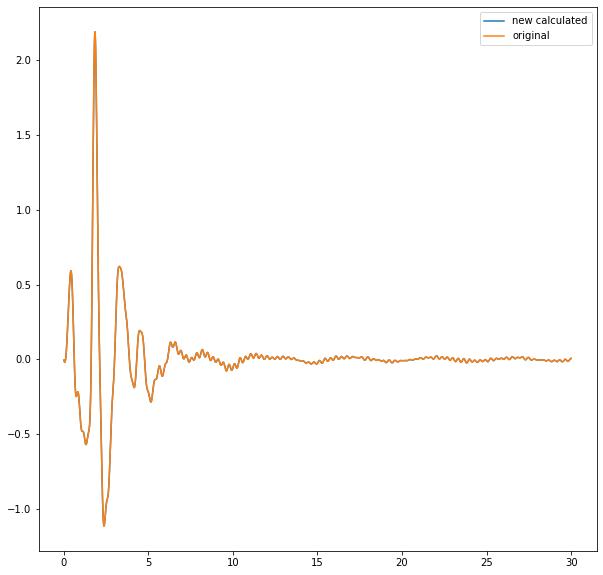

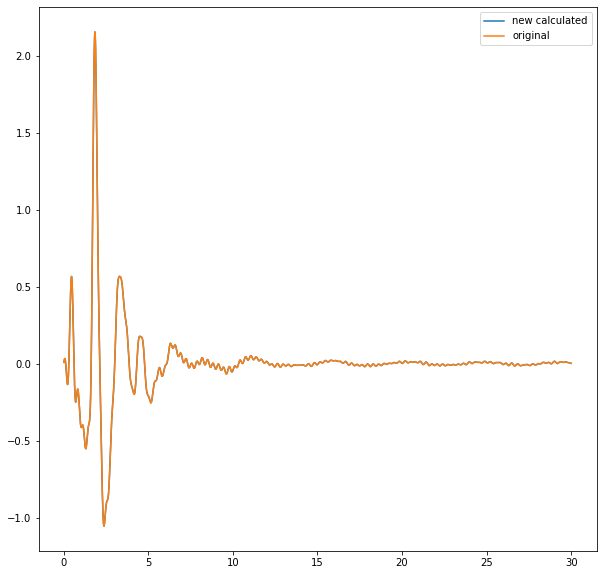

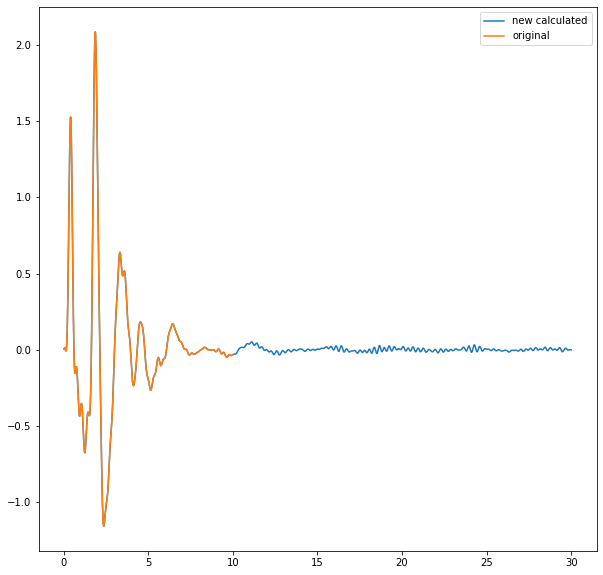

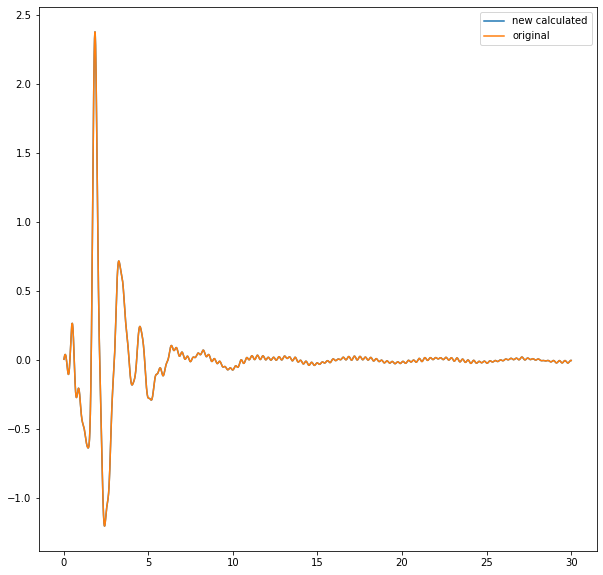

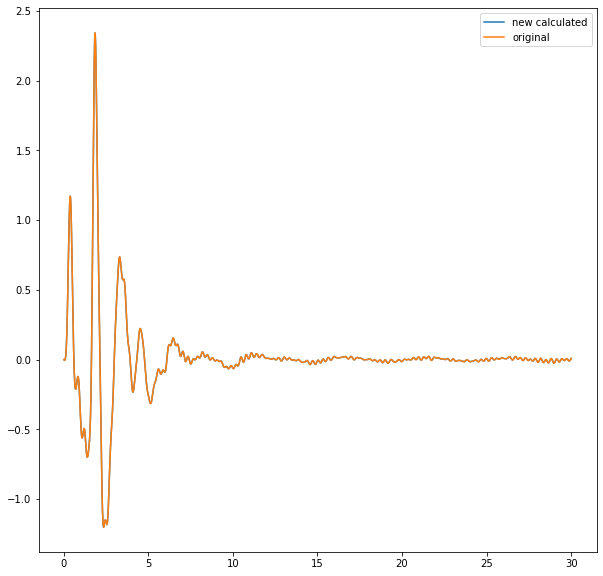

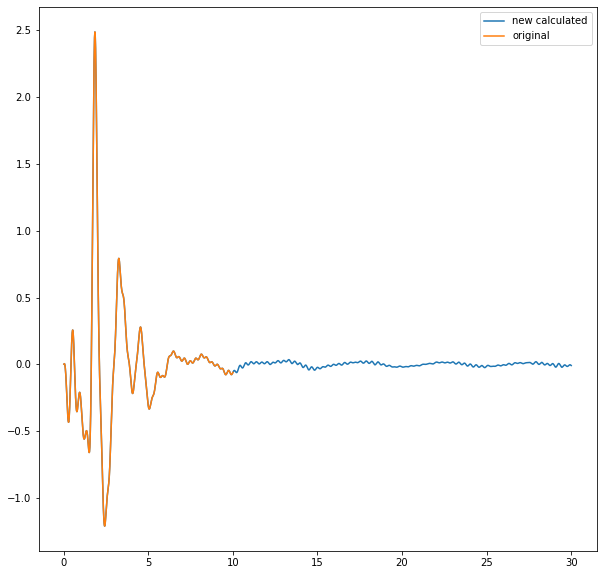

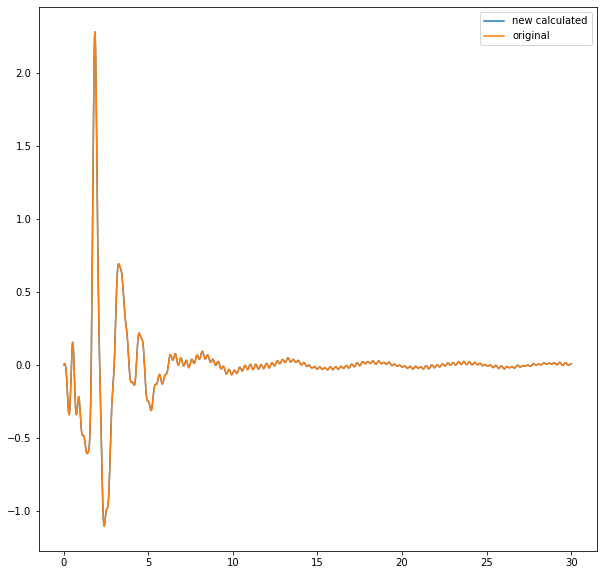

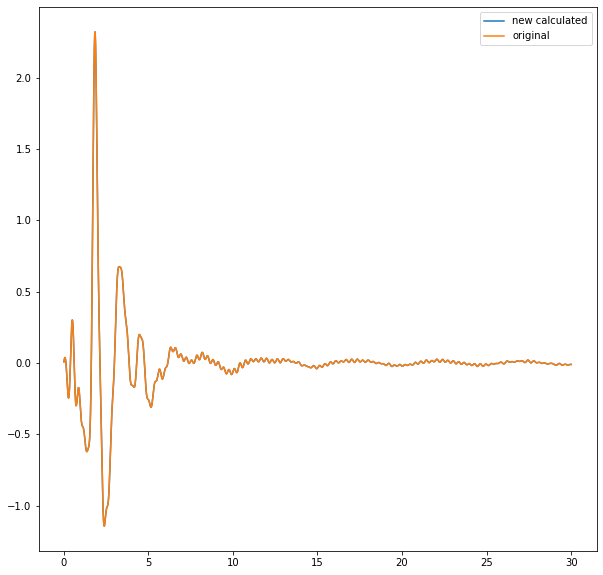

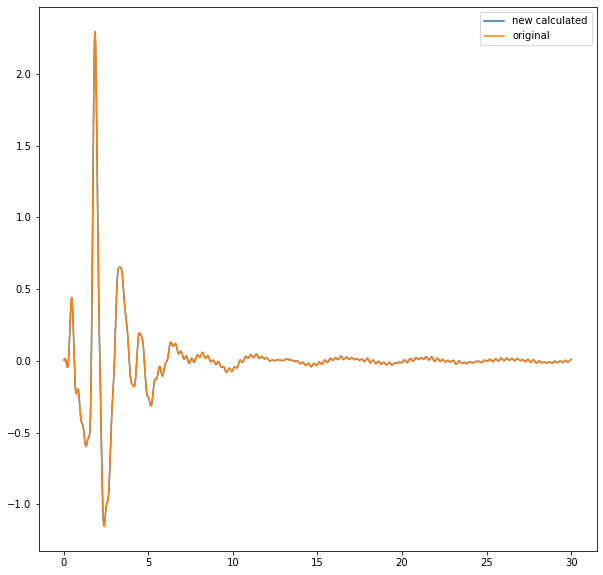

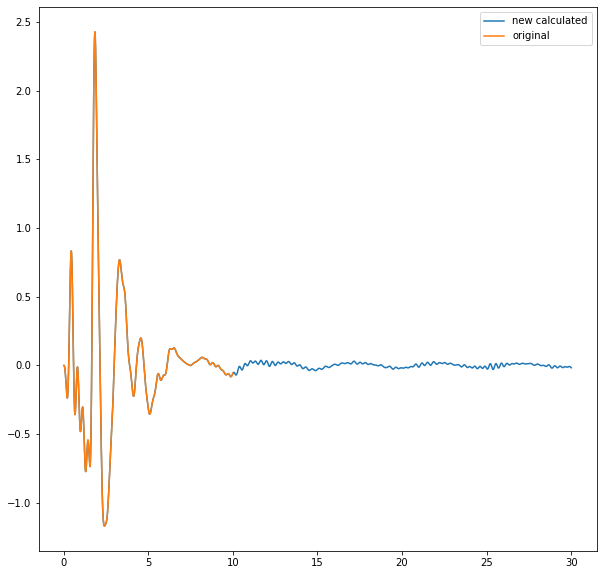

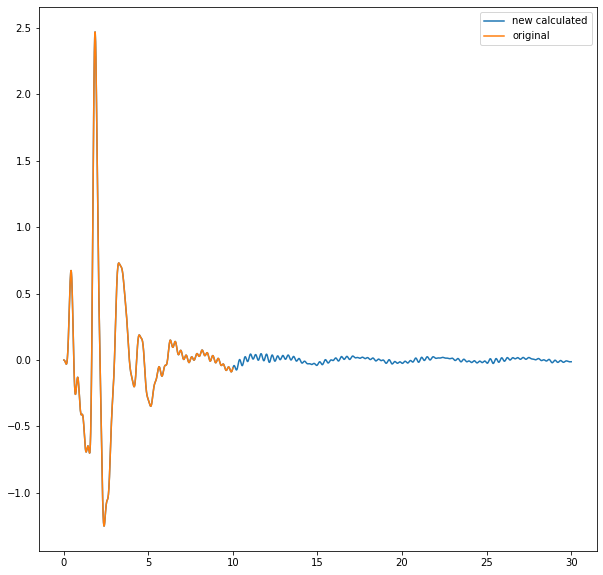

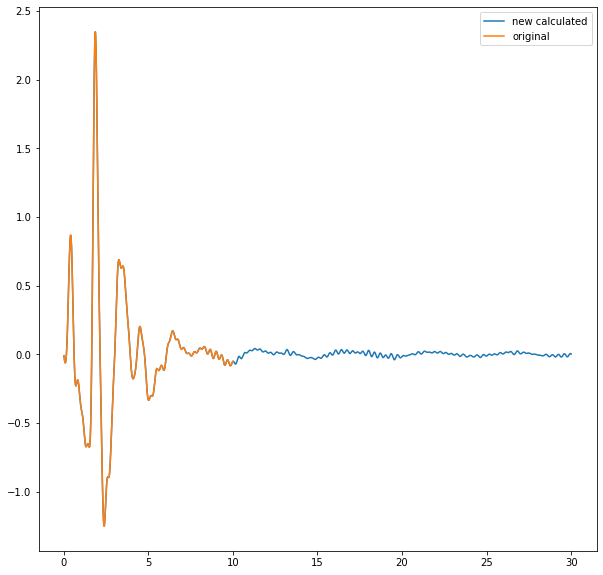

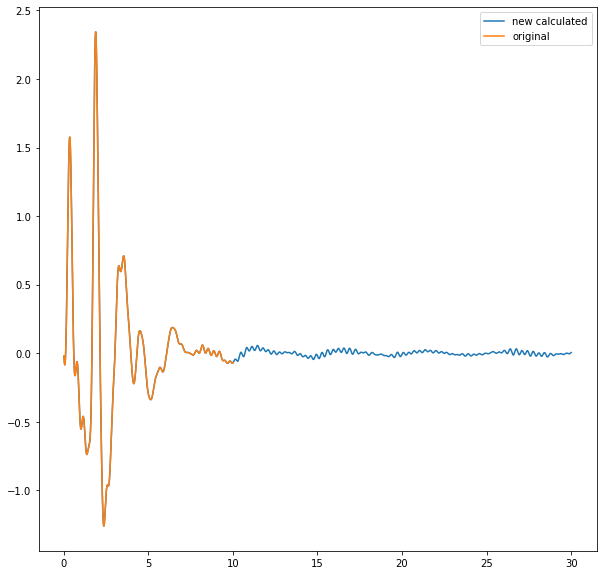

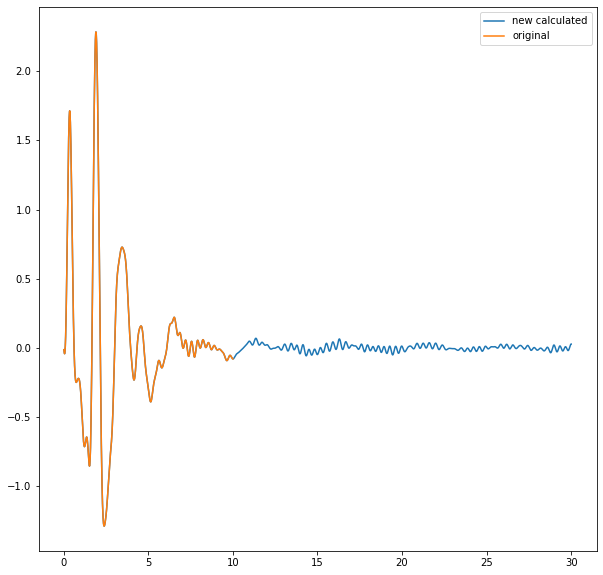

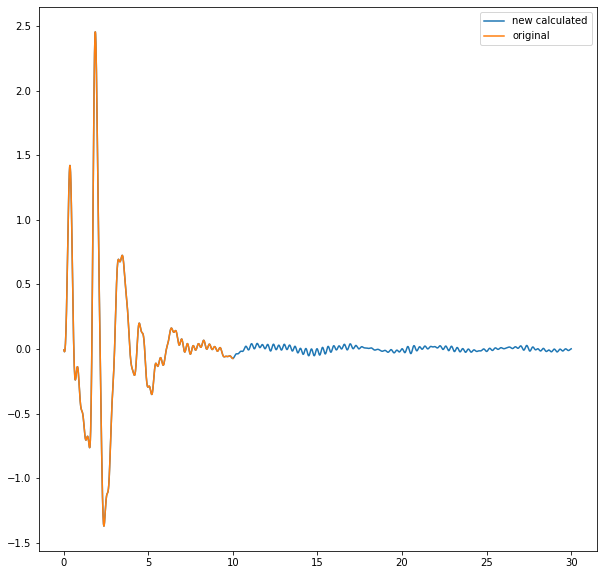

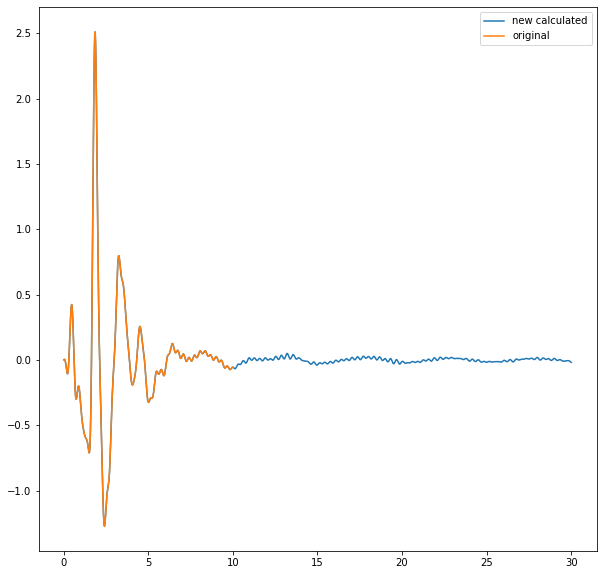

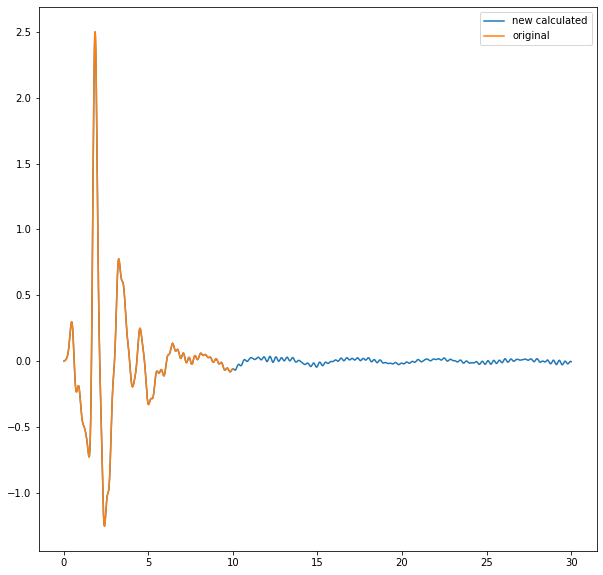

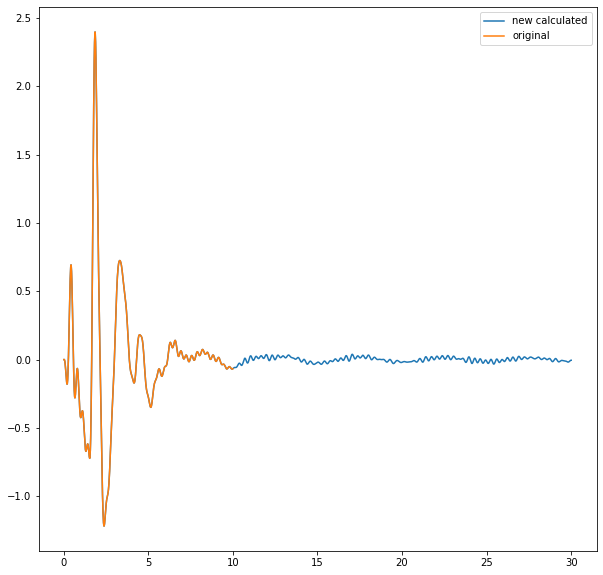

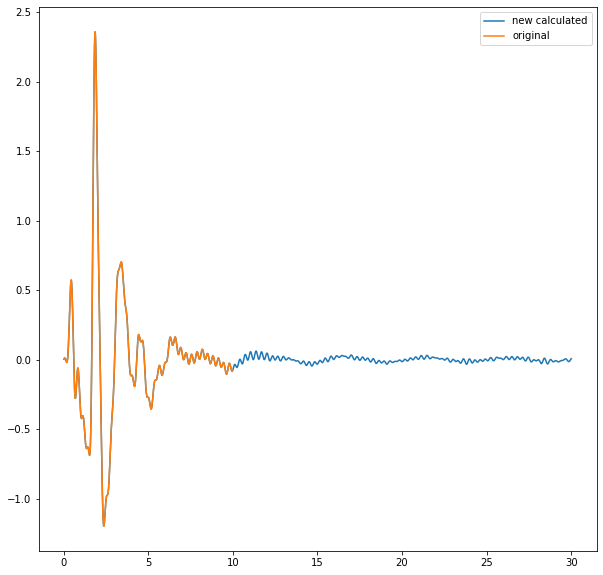

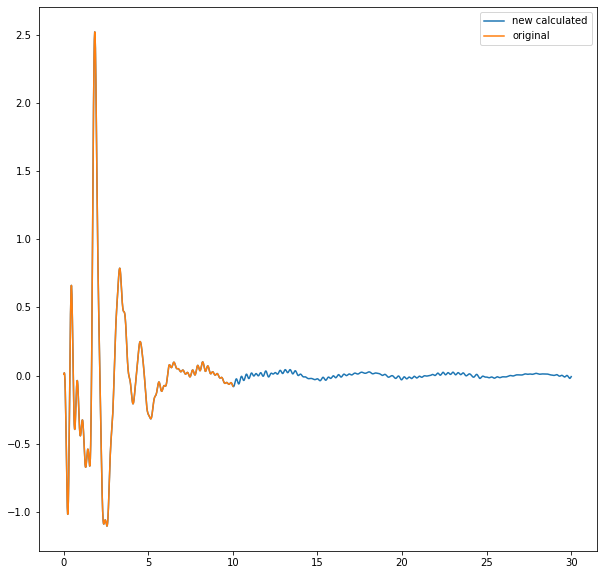

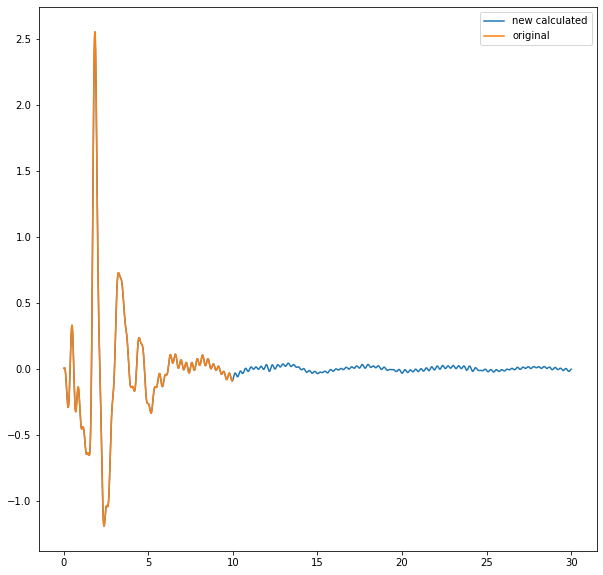

In [30]:
# for i in range(len(fps)):

# if True:
#     i=3

for i in range(len(fps)):

#     print(fps[i])
    # I q
    df = pd.read_csv(fps[i]+str_data_q)
    q = df['q'].to_numpy()
    I = df['I'].to_numpy()

    # parameters
    params = pd.read_csv(fps[i]+str_parameter)
    ds = float(params['ds'][0])
    qmax = float(params['qmax'][0])
    N = float(params['N'][0])
    damping = float(params['damping'][0])
    elements  = [0]*5
    elements_ratio = [0]*5
    elements[0] = params['Factor'][1]
    elements[1] = params['ds'][1]
    elements[2] = params['qmax'][1]
    elements[3] = params['N'][1]
    elements[4] = params['damping'][1]
    elements_ratio[0] = params['Factor'][2]
    elements_ratio[1] = params['ds'][2]
    elements_ratio[2] = params['qmax'][2]
    elements_ratio[3] = params['N'][2]
    elements_ratio[4] = params['damping'][2]

    for idx, element in enumerate(elements):

        if element == 'None':
            elements[idx] = 0
        else :
            elements[idx] = int(str(element)[:str(element).find('.')])
        elements_ratio[idx] = float(elements_ratio[idx])

    q, r, Iq, Autofit, phiq, phiq_damp, Gr, SS, fit_at_q, N=\
        _calculation_with_q(
        ds = ds,
        q = q,
        Iq = I,
        element_nums = elements,
        ratio = elements_ratio,
        is_full_q = True,
        damping = damping,
        rmax = 30,
        dr = 0.01,
        fit_at_q = qmax,
        N = N
    )

    # data confirm
    df = pd.read_csv(fps[i]+str_data_r)
    error = np.sum((df['Gr'][:1000] - Gr[:1000]))
#     print("index:{}, error:{}".format(i, error))

    new_df = pd.DataFrame({
        'r':r,
        'Gr':Gr
    })
    fp = os.path.split(fps[i])
    new_df.to_csv(fp[0]+"/"+fp[1]+"_r30_{}.csv".format(datetime.datetime.today().strftime("%y%m%d")),index=False) # todo: add today's date
#     os.remove(fp[0]+"/new_"+fp[1]+"_r30_{}.csv".format(210727))
    
    if error > 1:
        print(idx, error)
    df = pd.read_csv(fps[i]+str_data_r)
    plt.plot(r,Gr, label="new calculated")
    plt.plot(df['r'],df['Gr'], label="original")
    plt.legend()
    plt.show()
    
    

In [ ]:
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return array[idx]

search_q = q[q <= fit_at_q+0.03]
search_q[-1]

In [ ]:
search_q = find_nearest(q,fit_at_q+0.02)
search_q

In [ ]:
print(fit_at_q)
print(qmax)

In [ ]:
    df = pd.read_csv(fps[i]+str_data_r)
    plt.plot(r,Gr, label="new calculated")
    plt.plot(df['r'],df['Gr'], label="original")
    plt.legend()
    print(np.sum((df['Gr'] - Gr[:1000])))

In [ ]:
os.path.abspath(os.path.join(fps[0],"../.."))

In [ ]:
new_df = pd.DataFrame({'r':q,'Gr':I})

In [ ]:
from scipy.spatial import Delaunay
tri = Delaunay(np.array([q,np.arange(0,len(q))]).transpose())

In [ ]:
import datetime

In [ ]:
np.array([q,np.arange(0,len(q))]).transpose()